# Predicting Lab Attendance Using Logistical Regression

To solve the problem of predicting student presence on the lab day using logistic regression, the following detailed steps were taken based on the provided attendance data from self-made, semi-synthetic datset named "attendace_data.csv" ([which can be accessed by clicking here](https://drive.google.com/file/d/1bx7WN_TV2aH9uYdJbUITDkjWnxs4_H-N/view?usp=sharing)):

1. **Data Loading and Preprocessing**:
   - The CSV file was loaded into a pandas DataFrame.
   - Categorical variables like Gender, Morning Classes, Noon Class, Eve Class, and Reason were encoded for modeling purposes.

2. **Feature Selection**:
   - Features such as Gender, Morning Classes, Noon Class, Eve Class, CGPA, and Reason were selected as potential predictors of student presence on the lab day.

3. **Model Building**:
   - The dataset was split into training and testing sets using a 80-20 split.
   - A logistic regression model was initialized and trained on the training data.

4. **Model Evaluation**:
   - The model's performance was evaluated using accuracy as the metric by comparing predicted values with actual values from the test set.
   - The accuracy score provided an indication of how well the model predicts student presence.

5. **Test Example**:
   - A test example was created with specific features for a hypothetical student to demonstrate how the model predicts their presence on the lab day.

By following these steps, a logistic regression model was successfully built and tested on the attendance data to predict whether a student will be present on the lab day based on various factors such as gender, class attendance, CGPA, and reason for absence or presence.


Accuracy of the logistic regression model: 1.00
Prediction for test example: ['No']


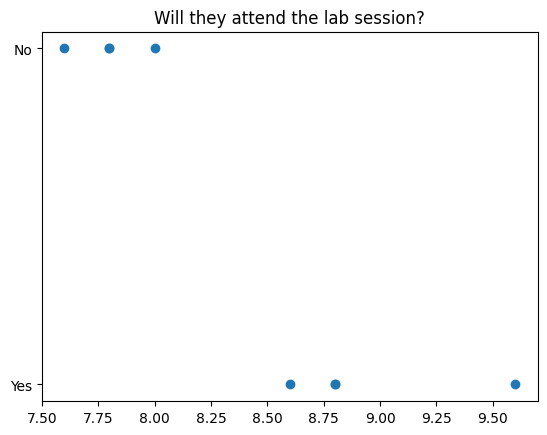

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("attendace_data.csv")

# Preprocessing
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})
data['Morning Classes'] = data['Morning Classes'].map({'A': 0, 'P': 1})
data['noon class'] = data['noon class'].map({'A': 0, 'P': 1})
data['Eve class'] = data['Eve class'].map({'A': 0, 'P': 1})
'''data['Reason'] = pd.factorize(data['Reason'])[0]'''

# Defining features and target variable
X = data[['Gender', 'Morning Classes', 'noon class', 'Eve class', 'CGPA']]
y = data['Present on Lab Day?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on testset
predictions = model.predict(X_test)

# Calculate the accuracy of model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the logistic regression model: {:.2f}".format(accuracy))

# example
example = pd.DataFrame({'Gender': [0], 'Morning Classes': [0], 'noon class': [0], 'Eve class': [0], 'CGPA': [7.9]})
prediction_example = model.predict(example)
print("Prediction for test example: {}".format(prediction_example))

#Plot


plt.scatter(X_test['CGPA'], y_test)
plt.title("Will they attend the lab session?")
plt.show()
